In [2]:
# TODO: delete this comment and replace it with the header comment
# that includes your name(s), the section of 1200 that you are registered for,
# the homework name, and a brief description of what it does 

# don't forget to rename this file!
'''

Ryan Oliva

Task 4

This is the completed data visualization/final project with all options in the menu fully integrated.

'''


# DO NOT LEAVE CODE THAT CAUSES ERRORS UNCOMMENTED IN THIS NOTEBOOK
# DO NOT LEAVE NON-CODE THAT CAUSES ERRORS UNCOMMENTED IN THIS NOTEBOOK
# also known as: make sure that your comments are comments!

'\n\nRyan Oliva\n\nTask 4\n\nThis is the completed data visualization/final project with all options in the menu fully integrated.\n\n'

In [3]:
%matplotlib inline


import matplotlib.pyplot as plt
import statistics

# You may add more imports as needed

# "BD" stands for "batting data" 
class BD:
    year = 0
    player_id = 1
    first_name = 2
    last_name = 3
    team_name = 4
    games = 5
    at_bats = 6
    runs = 7
    hits = 8
    doubles = 9
    triples = 10
    home_runs = 11
    rbi = 12
    walks = 13
    hbp = 14
    stolen_bases = 15
    caught_stealing = 16
    strike_outs = 17
    sac_flies = 18
    position = 19

In [4]:
def verify_baseball_data(data):
    """
    Verifies the structure and format of the baseball data:
        checks that all rows have the same number of columns
        checks that each column is the correct type (str for string columns, int for int columns)
        checks that it has the correct number of rows and the correct number of columns
    
    If your data is in the right format, you'll see the output:
        Rows: 74750
        Cols: 20
        Congrats! You have the correct shape of data!

    If you see something else, this will give you an indication of what is not right.

    Parameters:
    -----------
        data : list of lists
            From the baseball data (each sublist corresponds to a row from the input file)
    """
    rows = len(data)
    cols = len(data[0])
    
    def get_column_values(data, column): 
        '''
        This function gets all the values from a certain column in the data

        Parameters: the list of lists and which column

        Returns: a list of all the values 

        '''
        valuelist=[]
        for i in range(0,len(data)): #loop through data
            valuelist.append(data[i][column]) #get each value from the column 
        return valuelist


    # make sure all rows have the same number of columns
    same_number_columns = True
    i = 0
    while i < len(data):
        row = data[i]
        if len(row) != cols:
            same_number_columns = False
        i += 1

    if not same_number_columns:
        print("Some rows have a different number of columns!")

    # make sure each column is the correct type
    overall_type = True    
    str_cols = [BD.player_id, BD.first_name, BD.last_name, BD.team_name, BD.position]
    
    column = 0
    while column < cols:
        col_vals = get_column_values(data, column)
        correct_type = True
        j = 0
        while j < len(col_vals):
            val = col_vals[j]
            if ((column in str_cols) and type(val) is not str) or (column not in str_cols and type(val) is not int):
                correct_type = False
            j += 1

        if not correct_type:
            print("Column " + str(column) + " contains values that are not the right type!")
            print(col_vals[:10]) # print the first 10 values
            overall_type = False
        column += 1


    if overall_type and same_number_columns:
        print("Rows: " + str(rows))
        print("Cols: " + str(cols))

        if rows == 74750 and cols == 20:
            print("Congrats! You have the correct shape of data!")
        else:
            print("You have the incorrect shape of data!")
            print("You have # rows (should be 74750): " + str(rows))
            print("You have # columns (should be 20): " + str(cols))

Baseball Data Visualization Project
=============

Add more cells as needed! Make sure that your notebook runs without errors before turning it in for each checkpoint!

1: Line graph of games played for one player over time
2: Line graph of games played for one player over time separated by team
3: Histogram of runs scored for all players in one year (no cutoff)
4: Histogram of runs scored for all players in one year (cutoff = 100)
5: Graph of team presence over time
6: Homeruns over time (percentiles)
7: Total percentage of runs based on year
8: Box Plot of bases stolen based on team, year, and position.
0: Exit
What would you like to see?5


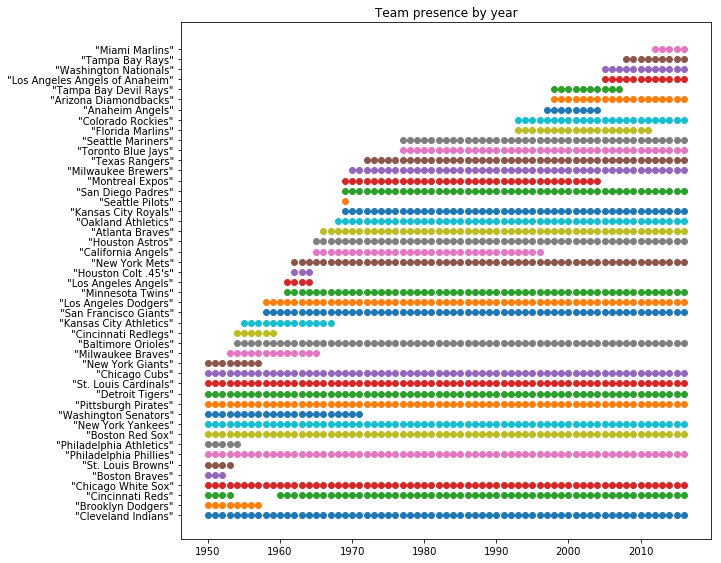

1: Line graph of games played for one player over time
2: Line graph of games played for one player over time separated by team
3: Histogram of runs scored for all players in one year (no cutoff)
4: Histogram of runs scored for all players in one year (cutoff = 100)
5: Graph of team presence over time
6: Homeruns over time (percentiles)
7: Total percentage of runs based on year
8: Box Plot of bases stolen based on team, year, and position.
0: Exit
What would you like to see?3
Which year would you like to see? 1985


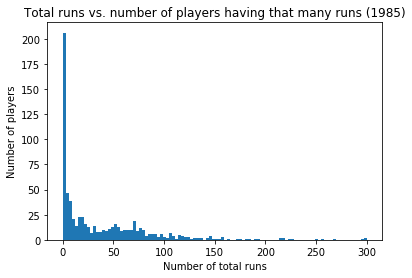

1: Line graph of games played for one player over time
2: Line graph of games played for one player over time separated by team
3: Histogram of runs scored for all players in one year (no cutoff)
4: Histogram of runs scored for all players in one year (cutoff = 100)
5: Graph of team presence over time
6: Homeruns over time (percentiles)
7: Total percentage of runs based on year
8: Box Plot of bases stolen based on team, year, and position.
0: Exit
What would you like to see?0
Bye


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
def convert_row_type(row):
    '''
    This function converts the input file from string to floats so calculations can be done with the numbers 
    
    parameters=each row of the input file 
    
    return the row converted to floats 
    '''
    for i in range(0,len(row)):# loops through each element of the row 
        if row[i].isnumeric():
            row[i]=int(row[i]) # converts the element
    return row

def is_blank(row):
    '''
    This function finds any blank spaces in a row and replaces it with a 0
    
    Parameter:row
    Returns: updated row 
    '''
    for i in range(0,len(row)): #loop through row
        if row[i]=='': #check to see if blank 
            row[i]=0 #replace with 0 
    return row


def read_data(filename):
    '''
    This function reads in the data from the csv file and saves the data as a list of lists
    
    Parameters: the file name
    
    Returns: list of lists 
    '''
    input_file=open(filename,"r") #open file 
    headers = input_file.readline()
    listOfRows=[] 
    for row in input_file: #loop through file
        rowList=row.strip("\n").split(",") #strip and split each line 
        rowList=convert_row_type(rowList) #convert to ints
        rowList=is_blank(rowList) #replace emptys with 0
        listOfRows.append(rowList) #add list to list of lists 
    return listOfRows

def get_menu_choice():
    '''
    This function is a menu that lets the user choose which graph they would like to see.
    
    No parameters 
    No returns 
    
    '''
    stillviewing=True
    data=read_data("battingData1950Present.csv")
    while stillviewing==True:
        print("1: Line graph of games played for one player over time")
        print("2: Line graph of games played for one player over time separated by team")
        print("3: Histogram of runs scored for all players in one year (no cutoff)")
        print("4: Histogram of runs scored for all players in one year (cutoff = 100)")
        print("5: Graph of team presence over time")
        print("6: Homeruns over time (percentiles)")
        print("7: Total percentage of runs based on year")
        print("8: Box Plot of bases stolen based on team, year, and position.")
        print("0: Exit")
        choice=input("What would you like to see?")
        if choice.isnumeric() == False:
            print("Invalid input, try again.")
        if choice =='0':
            print("Bye")
            stillviewing=False
            #break
        if choice=='1':
            print("Select a random player (1) or") # ask if the user wants random or chosen player
            choice2=input('Select a specific player (2)')
            if choice2=='1': # if user wants a random player 
                player_ids=get_column_values(data,BD.player_id)
                name=random.choice(player_ids) #get random player id
                player=get_matching_rows(data,BD.player_id,name) #get rows for that player 
                #print(player[1][1])
                x_axis=(get_column_values(player, BD.year)) #graph 
                y_axis=(get_column_values(player, BD.games)) #graph 
                plt.plot(x_axis,y_axis,linestyle='-',marker='o')
                plt.title('Number of games played by year for ' + player[0][2]+" "+player[0][3])
                plt.ylabel('Number of games')
                plt.xlabel('Year')
                plt.savefig("Option1Graph.pdf")
                plt.show()
            if choice2=='2': #if user wants a specific player 
                name=input("Enter the player ID: ") #get id
                player=get_matching_rows(data,BD.player_id,name) #get rows for that number 
                x_axis=get_column_values(player, BD.year) #get all the years they played 
                y_axis=get_column_values(player, BD.games) #get the games 
                plt.plot(x_axis,y_axis,linestyle='-',marker='o')
                plt.title('Number of games played by year for ' + player[0][2]+" "+player[0][3])
                plt.ylabel('Number of games for ' )
                plt.xlabel('Year')
                plt.savefig("Option1Graph.pdf")
                plt.show()
        elif choice =='2':
            print("Select a random player (1) or") # ask if the user wants random or chosen player
            choice2=input('Select a specific player (2)')
            if choice2=='2':
                name=input("Enter the player ID: ")
                player=get_matching_rows(data,BD.player_id,name)
                teams=get_unique_column_values(player,BD.team_name)
                for i in range(0,len(teams)):
                    rows_of_team=get_matching_rows(player, BD.team_name,teams[i])
                    y_axis=get_column_values(rows_of_team,BD.games)
                    x_axis=get_column_values(rows_of_team,BD.year)
                    plt.plot(x_axis,y_axis,linestyle='-',marker='o',label=teams[i])
                plt.ylabel('Number of games for ' )
                plt.xlabel('Year')
                plt.title('Number of games played by year for ' + player[0][2]+" "+player[0][3])
                plt.legend()
                plt.savefig("Option2Graph.pdf")
                plt.show()
            if choice2=='1':
                player_ids=get_column_values(data,BD.player_id)
                name=random.choice(player_ids)
                player=get_matching_rows(data,BD.player_id,name)
                teams=get_unique_column_values(player,BD.team_name)
                for i in range(0,len(teams)):
                    rows_of_team=get_matching_rows(player, BD.team_name,teams[i])
                    y_axis=get_column_values(rows_of_team,BD.games)
                    x_axis=get_column_values(rows_of_team,BD.year)
                    plt.plot(x_axis,y_axis,linestyle='-',marker='o',label=teams[i])
                plt.ylabel('Number of games for ' )
                plt.xlabel('Year')
                plt.title('Number of games played by year for ' + player[0][2]+" "+player[0][3])
                plt.legend()
                plt.savefig("Option2Graph.pdf")
                plt.show()                    
        elif choice =='3':
            year=input("Which year would you like to see? ")
            year=int(year)
            runs_list=[]
            rows_of_years=get_matching_rows(data,BD.year,year) #get all the rows with the associated year 
            player_ids=get_unique_column_values(rows_of_years,BD.player_id)  # get all the player id's from that year
            for i in range(0,len(player_ids)):
                rows_of_player=get_matching_rows(rows_of_years,BD.player_id,player_ids[i]) #get the rows for each individual player
                total_runs_for_player=sum(get_column_values(rows_of_player,BD.runs)) #count runs 
                runs_list.append(total_runs_for_player)
            plt.hist(runs_list,bins=100) #graph list 
            titleyear=str(rows_of_years[0][0])
            plt.title("Total runs vs. number of players having that many runs (" +titleyear+")")
            plt.ylabel('Number of players' )
            plt.xlabel('Number of total runs')
            plt.savefig("Option3Graph.pdf")
            plt.show()
        elif choice =='4':
            year=input("Which year would you like to see? ")
            cutoff=input("What is the minimum cutoff you would like to see?")
            year=int(year)
            cutoff=int(cutoff)
            runs_list=[]
            cutoff_list=[]
            rows_of_years=get_matching_rows(data,BD.year,year) #get all the rows with the associated year 
            player_ids=get_unique_column_values(rows_of_years,BD.player_id) # get all the player id's from that year 
            for i in range(0,len(player_ids)): 
                rows_of_player=get_matching_rows(rows_of_years,BD.player_id,player_ids[i]) #get the rows for each individual player
                total_runs_for_player=sum(get_column_values(rows_of_player,BD.runs)) #count total runs
                runs_list.append(total_runs_for_player) # add the number to a list to graph 
            for i in range(0,len(runs_list)): #loop through the list to ensure each element meets the cut off requirement
                if runs_list[i] >= cutoff: #if element doesn't meet cutoff
                    cutoff_list.append(runs_list[i])
            plt.hist(cutoff_list,bins=100)
            titleyear=str(rows_of_years[0][0])
            plt.ylabel('Number of players' )
            plt.xlabel('Number of total runs')
            plt.title("Total runs vs. number of players having that many runs (" +titleyear+")")
            plt.savefig("Option4Graph.pdf")
            plt.show()
        elif choice =='5':
            teams=get_unique_column_values(data,BD.team_name) #get the team names
            plt.figure(figsize=(9.5,9.5)) #set the figure size 
            for i in range(0,len(teams)): 
                row=get_matching_rows(data,BD.team_name,teams[i]) #get all the rows for each team
                yearsOfRow=get_unique_column_values(row,BD.year) #get the years each team played 
                tempList=[]
                for a in range(0,len(yearsOfRow)):
                    tempList.append(i) #add the years to a list 
                plt.scatter(yearsOfRow,tempList)#plot the years each team was active 
            plt.yticks(range(len(teams)),teams) #set the y-axis to correctly show each team name
            plt.title("Team presence by year") # name graph 
            plt.savefig("Option5Graph.pdf")
            plt.show()
        elif choice=='6': #perccentile graph 
            years=get_unique_column_values(data,BD.year) #get all the years listed in the data
            MaximumHomerunsByYear=[]
            NinetyHomeruns=[]
            HalfHomeruns=[]
            for i in range(0,len(years)): #go through each year 
                rows=get_matching_rows(data,BD.year,years[i])
                runs=get_column_values(rows,BD.home_runs)  #get the runs from each year 
                runs.sort() #sort the list 
                MaximumHomerunsByYear.append(max(runs)) #find the max to get the maximum percentile
                NinetyHomeruns.append(percentile(runs,0.99)) #call the percentile function to get the 99th percentile
                HalfHomeruns.append(percentile(runs,0.5)) #call the percentile function to get the 50th percentile
            plt.plot(years,MaximumHomerunsByYear,label="Maximum") #graph 
            plt.plot(years,NinetyHomeruns,label="99th Percentile") #graph 
            plt.plot(years,HalfHomeruns,label="50th Percentile")
            plt.title("Homeruns per year by player")
            plt.ylabel("Number of homeruns")
            plt.xlabel("Year")
            plt.legend()
            plt.savefig("Option6Graph.pdf")
            plt.show()
        elif choice=='7': #pie chart graph 
            years=get_unique_column_values(data,BD.year) #get all the years they were active 
            total=0
            labels=[]
            percentages=[]
            for i in range(0,len(years)): # go through each year 
                rows_for_thatYear=get_matching_rows(data,BD.year,years[i]) #rows for that year
                runs_forRow=sum(get_column_values(rows_for_thatYear,BD.runs)) # get the sum of all the runs 
                total+=runs_forRow


            for i in range(0,len(years)): # go through years again to find the correct percentage 
                labels.append(years[i]) #add each year to labels
                rows_for_thatYear=get_matching_rows(data,BD.year,years[i]) # get rows for that year 
                runs_forRow=sum(get_column_values(rows_for_thatYear,BD.runs)) # sum the runs
                percentage=round((runs_forRow/total)*100,2) #find the percentage
                percentages.append(percentage) #add to list 

            plt.figure(figsize=(20,20))
            plt.pie(percentages,autopct='%1.1f%%',labels=labels)
            plt.title("Percentage of total runs based on year")
            plt.savefig("Option7Graph.pdf")
            plt.show()
        elif choice =='8': #box plot of bases stolen by team,position, and year 
            choice=input("Would you like to select the team,position,and year (1)? Or would you like a random selection?(2)")
            if int(choice)==1: # if the user has a selection
                    team=input("which team would you like?")
                    year=input("Which year would you like?")
                    position=input("Which position would you like?")
                    year=int(year)
                    team='"' +team+ '"'
                    rows_for_team=get_matching_rows(data,BD.team_name,team) #get the rows of that team
                    rows_for_Year= get_matching_rows(rows_for_team,BD.year,year) #get the years of that team
                    rows_for_position=get_matching_rows(rows_for_Year,BD.position,position) # get the rows for that position
                    bases_stolen=get_column_values(rows_for_position,BD.stolen_bases) #get the values of stolen bases
                    if not bases_stolen: #if no bases were stolen in this case 
                        print("\n No bases stolen for the "+position+ " players on the "+ team+ " in "+ str(year)+"\n")
                    else:
                        plt.boxplot(bases_stolen)
                        plt.title("Bases Stolen for the "+position+ " players on the "+ team+ " in "+ str(year))
                        plt.ylabel("Bases stolen")
                        plt.savefig("Option8Graph.pdf")
                        plt.show()

            if int(choice)==2: #if the user wants a random selection
                possible_teams=get_unique_column_values(data,BD.team_name)
                possible_years=get_unique_column_values(data,BD.year)
                possible_positions=get_unique_column_values(data,BD.position)

                team=random.choice(possible_teams) #pick a team
                year=random.choice(possible_years) #pick a year 
                position=random.choice(possible_positions) #pick a position
                rows_for_team=get_matching_rows(data,BD.team_name,team)
                rows_for_Year= get_matching_rows(rows_for_team,BD.year,year)
                rows_for_position=get_matching_rows(rows_for_Year,BD.position,position)
                bases_stolen=get_column_values(rows_for_position,BD.stolen_bases)
                if not bases_stolen: #if no bases were stolen in this case
                    print("\nNo bases stolen for the "+position+ " players on the "+ team+ " in "+ str(year)+ "\n")
                else:
                    plt.boxplot(bases_stolen)
                    plt.title("Bases Stolen for the "+position+ " players on the "+ team+ " in "+ str(year))
                    plt.ylabel("Bases stolen")
                    plt.savefig("Option8Graph.pdf")
                    plt.show()

def get_matching_rows(data,column,target):
    '''
    This function returns the matching rows 
    
    Parameters: the list of lists, which column, and what you're checking for
    returns: list of matches
    '''
    matchList=[]
    for i in range(0,len(data)): #loop through data
        if data[i][column]==target:
            matchList.append(data[i])
    return matchList

def get_unique_values(dataList):
    
    """
    This function returns a list of unique values from another list
    
    Parameters:a list
    returns: another list 
    """
    newList=[]
    for i in range(0,len(dataList)): #loop through original list
        if dataList[i] not in newList: #find unique values 
            newList.append(dataList[i])
    return newList
def get_column_values(data, column): 
    '''
    This function gets all the values from a certain column in the data
    
    Parameters: the list of lists and which column
    
    Returns: a list of all the values 
    
    '''
    valuelist=[]
    for i in range(0,len(data)): #loop through data
        valuelist.append(data[i][column]) #get each value from the column 
    return valuelist

def percentile(listofNumbers,k):
    '''
    This function takes in a list of numbers and which percentile (k) to solve for
    
    returns: the percentile of the given list 
    
    parameters: a list of numbers and which percentile the user would like
    
    '''
    length=len(listofNumbers)-1 #find length of list 
    part2=math.floor(k*length) #calulcate percentile
    return listofNumbers[part2] #return the number in the list that is the kth percentile

def get_unique_column_values(data, column):
    '''
    This function will return the unique values from a specific column in the data
    
    Parameters: the list of lists and which column 
    
    Returns: unique values from the column in a list 
    '''
    columnvalues=get_column_values(data,column)#get all the column values 
    unique=[]
    unique=get_unique_values(columnvalues)
    return unique
def main():
    data=read_data("battingData1950Present.csv")
    get_menu_choice()

    
main()